# Estadistica Aplicada
## Jorge Sebastian Aguirre Jimenez 1947870
## 23 de octubre

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
## estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [6]:
plt.rcParams['figure.figsize']=(10,6)

In [7]:
pasajero=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month',parse_dates=True)

In [8]:
pasajero=pasajero.asfreq('MS')

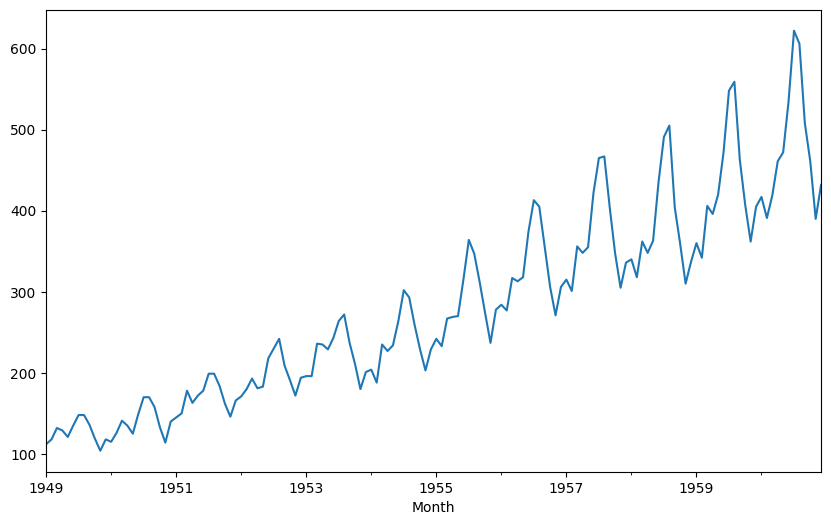

In [10]:
pasajero['Thousands of Passengers'].plot();

Esta serie tiene tendencia positiva y componente estacional

In [11]:
prueba_dfa=adfuller(pasajero['Thousands of Passengers'])
pvalues=prueba_dfa[1]
pvalues.round(2)

0.99

No rechazamos H0, signigfica que es una serie no estacionaria

In [12]:
pasajero['diff']=pasajero['Thousands of Passengers'].diff()

In [13]:
prueba_dfa1=adfuller(pasajero['diff'].dropna())
pvalues=prueba_dfa1[1]
pvalues.round(3)

0.054

In [14]:
pasajero['diff2']=pasajero['diff'].diff()

In [15]:
prueba_dfa1=adfuller(pasajero['diff2'].dropna())
pvalues=prueba_dfa1[1]
pvalues.round(3)

0.0

Rechazamos H0 por lo que las 2das diferencias son estacionarias

* pasajeros I(2)
* 1ras diferencias I(1)
* 2das diferencias I(0)

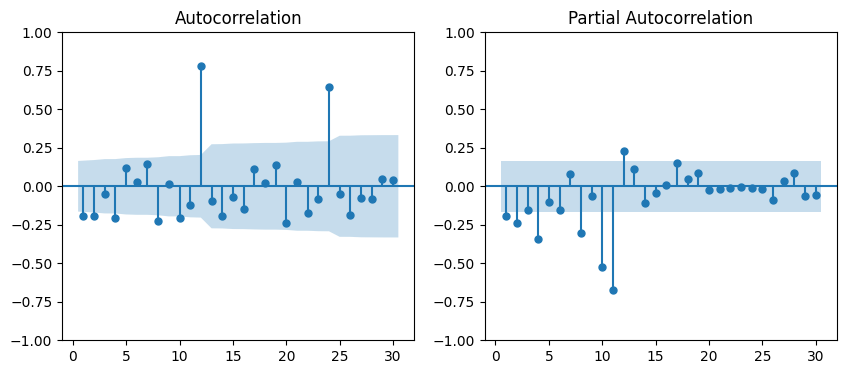

In [21]:
## Graficas de autocorrelacion
ig, ax=plt.subplots(1,2,figsize=(10,4))
plot_acf(pasajero['diff2'].dropna(),zero=False,lags=30,ax=ax[0])
plot_pacf(pasajero['diff2'].dropna(),zero=False, lags=30, ax=ax[1])
plt.show()

Esto nos confirma que es una serie estacionaria

In [23]:
## Determinar el orden
## Vamos a usar Autoarima
pm.auto_arima(pasajero['Thousands of Passengers'], start_p=1, max_p=7,start_q=1, max_q=7, m=12, ic='aic', seasonal=True, start_Q=1, start_P=1, max_P=7, max_Q=7)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Autoarima nos sugiere SARIMA(0,1,1)(2,1,0,12)

In [25]:
## Estimar modelo
model= ARIMA(pasajero['Thousands of Passengers'], order=(0,1,1), seasonal_order=(2,1,0,12))
results=model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:           Thousands of Passengers   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                           Mon, 23 Oct 2023   AIC                           1019.178
Time:                                   15:58:23   BIC                           1030.679
Sample:                               01-01-1949   HQIC                          1023.851
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372

In [26]:
pasajero.tail(1)

,Thousands of Passengers,diff,diff2
Month,,,
1960-12-01,432,42.0,113.0


In [29]:
## Pronostico
results.predict('1961-01-01', '1963-12-01')

1961-01-01    451.347076
1961-02-01    427.102222
1961-03-01    463.382490
1961-04-01    499.705771
1961-05-01    514.035525
1961-06-01    571.851867
1961-07-01    661.310508
1961-08-01    648.081675
1961-09-01    551.284691
1961-10-01    501.068279
1961-11-01    434.052984
1961-12-01    479.233768
1962-01-01    495.569171
1962-02-01    469.578456
1962-03-01    497.955024
1962-04-01    544.916438
1962-05-01    556.350007
1962-06-01    616.910052
1962-07-01    708.165787
1962-08-01    689.435153
1962-09-01    592.107043
1962-10-01    544.008548
1962-11-01    471.532195
1962-12-01    516.127935
1963-01-01    534.240091
1963-02-01    508.800960
1963-03-01    539.738523
1963-04-01    584.297670
1963-05-01    596.726148
1963-06-01    655.955970
1963-07-01    747.458851
1963-08-01    729.939146
1963-09-01    632.906669
1963-10-01    583.931319
1963-11-01    512.892704
1963-12-01    558.168624
Freq: MS, Name: predicted_mean, dtype: float64

In [30]:
## Pronosticar pasado
pasajero['Pronostico SARIMA']= results.predict()

<Axes: xlabel='Month'>

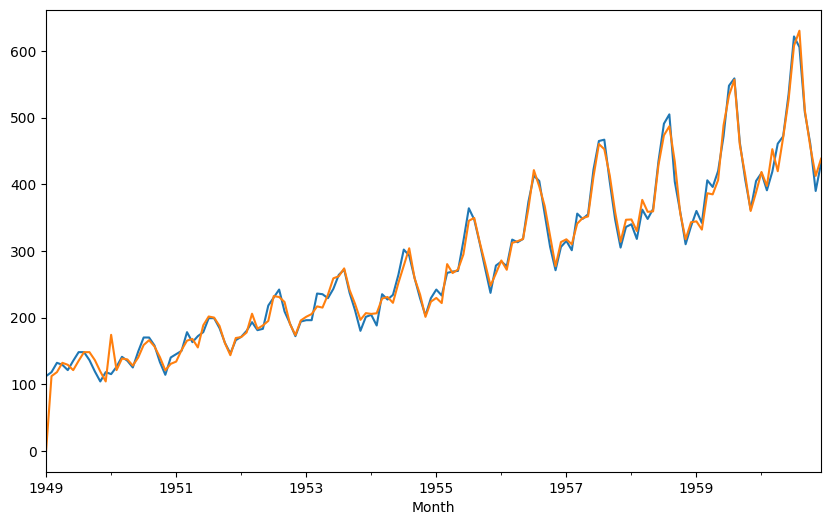

In [31]:
pasajero['Thousands of Passengers'].plot()
pasajero['Pronostico SARIMA'].plot()

<Axes: xlabel='Month'>

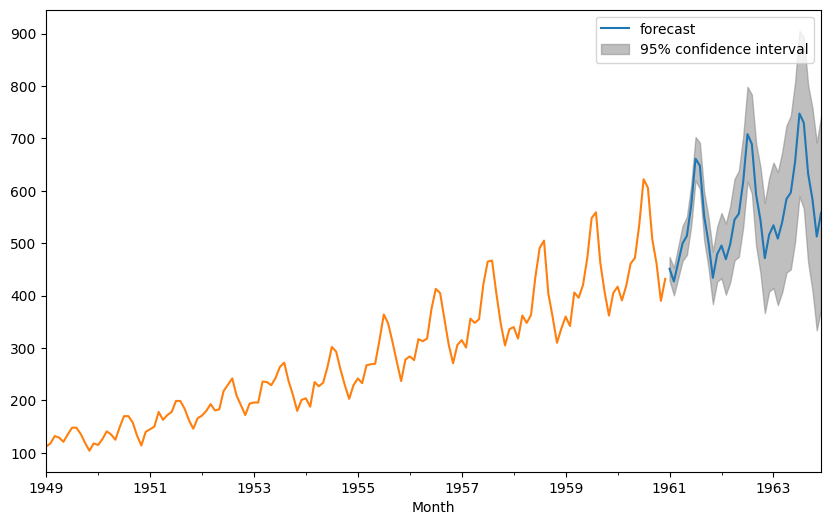

In [36]:
## Graficar pronostico
plot_predict(results,'1961-01-01','1963-12-01')
pasajero['Thousands of Passengers'].plot()